In [1]:
#generate a new token to extract data from kaggle api

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download salader/dogs-vs-cats
#download entire folder from kaggle

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:09<00:00, 112MB/s] 
100% 1.06G/1.06G [00:09<00:00, 117MB/s]


In [3]:
#unzip the folder
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization

In [5]:
#generators to load images in batches

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32, image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32, image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [15]:
for images, labels in train_ds.take(1):  # 'train_ds' is the dataset you're using, you can use 'validation_ds' similarly
    # Extract the first image and its label
    image = images[0]
    label = labels[0]

print(image.numpy().astype("uint8"))
print(image.numpy().astype("uint8").shape)

[[[135 139 142]
  [135 139 142]
  [136 140 143]
  ...
  [ 71  67  68]
  [ 67  63  62]
  [ 67  63  60]]

 [[135 139 142]
  [135 139 142]
  [136 140 143]
  ...
  [ 72  68  69]
  [ 68  64  63]
  [ 67  63  60]]

 [[135 139 142]
  [136 140 143]
  [137 141 144]
  ...
  [ 73  69  70]
  [ 69  65  64]
  [ 67  63  60]]

 ...

 [[136 107  93]
  [138 109  95]
  [141 112  98]
  ...
  [104  92  86]
  [102  90  81]
  [102  88  77]]

 [[139 110  96]
  [144 115 101]
  [144 115 101]
  ...
  [104  93  87]
  [102  90  81]
  [102  88  77]]

 [[144 115 101]
  [142 113  99]
  [140 111  97]
  ...
  [104  93  87]
  [101  89  80]
  [100  86  75]]]
(256, 256, 3)


In [16]:
image  #this is a tensor of (256,256,3) #rgb image

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[135.      , 139.      , 142.      ],
        [135.42383 , 139.42383 , 142.42383 ],
        [136.0561  , 140.0561  , 143.0561  ],
        ...,
        [ 71.74609 ,  67.74609 ,  68.74609 ],
        [ 67.91139 ,  63.911396,  62.911396],
        [ 67.      ,  63.      ,  60.      ]],

       [[135.      , 139.      , 142.      ],
        [135.68378 , 139.68378 , 142.68378 ],
        [136.65591 , 140.65591 , 143.65591 ],
        ...,
        [ 72.36557 ,  68.36557 ,  69.36557 ],
        [ 68.46271 ,  64.46271 ,  63.462704],
        [ 67.      ,  63.      ,  60.      ]],

       [[135.75195 , 139.75195 , 142.75195 ],
        [136.3187  , 140.3187  , 143.3187  ],
        [137.      , 141.      , 144.      ],
        ...,
        [ 73.590576,  69.590576,  70.590576],
        [ 69.12857 ,  65.12857 ,  64.12857 ],
        [ 67.75195 ,  63.751953,  60.751953]],

       ...,

       [[136.48349 , 107.4835  ,  93.4835  ],
        [138.

In [18]:
image.numpy()

array([[[135.      , 139.      , 142.      ],
        [135.42383 , 139.42383 , 142.42383 ],
        [136.0561  , 140.0561  , 143.0561  ],
        ...,
        [ 71.74609 ,  67.74609 ,  68.74609 ],
        [ 67.91139 ,  63.911396,  62.911396],
        [ 67.      ,  63.      ,  60.      ]],

       [[135.      , 139.      , 142.      ],
        [135.68378 , 139.68378 , 142.68378 ],
        [136.65591 , 140.65591 , 143.65591 ],
        ...,
        [ 72.36557 ,  68.36557 ,  69.36557 ],
        [ 68.46271 ,  64.46271 ,  63.462704],
        [ 67.      ,  63.      ,  60.      ]],

       [[135.75195 , 139.75195 , 142.75195 ],
        [136.3187  , 140.3187  , 143.3187  ],
        [137.      , 141.      , 144.      ],
        ...,
        [ 73.590576,  69.590576,  70.590576],
        [ 69.12857 ,  65.12857 ,  64.12857 ],
        [ 67.75195 ,  63.751953,  60.751953]],

       ...,

       [[136.48349 , 107.4835  ,  93.4835  ],
        [138.12238 , 109.12237 ,  95.12237 ],
        [141.23729 , 1

array([[[135, 139, 142],
        [135, 139, 142],
        [136, 140, 143],
        ...,
        [ 71,  67,  68],
        [ 67,  63,  62],
        [ 67,  63,  60]],

       [[135, 139, 142],
        [135, 139, 142],
        [136, 140, 143],
        ...,
        [ 72,  68,  69],
        [ 68,  64,  63],
        [ 67,  63,  60]],

       [[135, 139, 142],
        [136, 140, 143],
        [137, 141, 144],
        ...,
        [ 73,  69,  70],
        [ 69,  65,  64],
        [ 67,  63,  60]],

       ...,

       [[136, 107,  93],
        [138, 109,  95],
        [141, 112,  98],
        ...,
        [104,  92,  86],
        [102,  90,  81],
        [102,  88,  77]],

       [[139, 110,  96],
        [144, 115, 101],
        [144, 115, 101],
        ...,
        [104,  93,  87],
        [102,  90,  81],
        [102,  88,  77]],

       [[144, 115, 101],
        [142, 113,  99],
        [140, 111,  97],
        ...,
        [104,  93,  87],
        [101,  89,  80],
        [100,  86,  75]]], dtype=uint8)
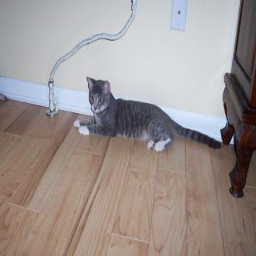

In [23]:
image.numpy().astype('uint8')

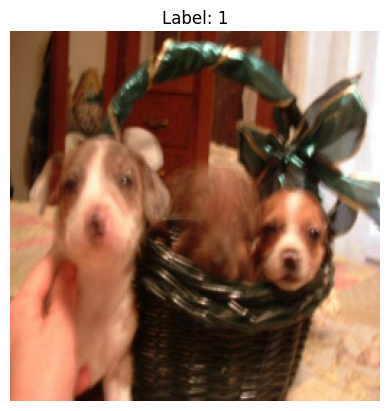

In [ ]:
un#dog - label 1

import matplotlib.pyplot as plt
# Extract one batch from the dataset
for images, labels in train_ds.take(3):  # 'train_ds' is the dataset you're using, you can use 'validation_ds' similarly
    # Extract the first image and its label
    image = images[0]
    label = labels[0]

# Display the image
plt.imshow(image.numpy().astype("uint8"))  # Convert tensor to a numpy array and display
plt.title(f"Label: {label.numpy()}")
plt.axis('off')  # Turn off axis
plt.show()


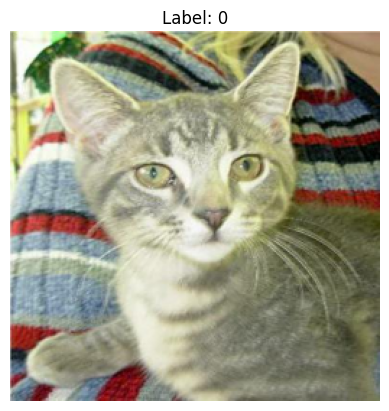

In [ ]:
#cat - label 0

import matplotlib.pyplot as plt
# Extract one batch from the dataset
for images, labels in train_ds.take(2):  # 'train_ds' is the dataset you're using, you can use 'validation_ds' similarly
    # Extract the first image and its label
    image = images[0]
    label = labels[0]

# Display the image
plt.imshow(image.numpy().astype("uint8"))  # Convert tensor to a numpy array and display
plt.title(f"Label: {label.numpy()}")
plt.axis('off')  # Turn off axis
plt.show()


In [26]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [27]:
#normalise
for image, label in train_ds.take(1):
  print(image[0].numpy().astype('uint8'))

#example image is now in range of 0-1

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
#shape of tensor - (256,256,3)

#create cnn model

model= Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid',  activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We should always apply dropout in fully connected layer instead of Conv2D layers since whole point of that layer is to learn spatial arrangement of features - so we should only apply that in fully connected layer to avoid losing any features in pixel (Source - https://www.reddit.com/r/MachineLearning/comments/42nnpe/why_do_i_never_see_dropout_applied_in/?rdt=54696)

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(
  monitor = 'val_loss',
     min_delta=0.001,               # minimium amount of change to count as an improvement
    patience=5
)

In [ ]:
history = model.fit(train_ds, validation_data  = validation_ds, epochs = 10, callbacks = callbacks)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 84ms/step - accuracy: 0.5771 - loss: 2.5120 - val_accuracy: 0.7096 - val_loss: 0.5663
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 79ms/step - accuracy: 0.7148 - loss: 0.5575 - val_accuracy: 0.7420 - val_loss: 0.5162
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.7788 - loss: 0.4691 - val_accuracy: 0.7802 - val_loss: 0.4845
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 84ms/step - accuracy: 0.8171 - loss: 0.4076 - val_accuracy: 0.7440 - val_loss: 0.5015
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.8524 - loss: 0.3411 - val_accuracy: 0.7866 - val_loss: 0.4935
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.8860 - loss: 0.2670 - val_accuracy: 0.7746 - val_loss: 0.5209
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.9185 - loss: 0.1962 - val_accuracy: 0.7916 - val_loss: 0.5849
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.9454 - loss: 0.1441 - 

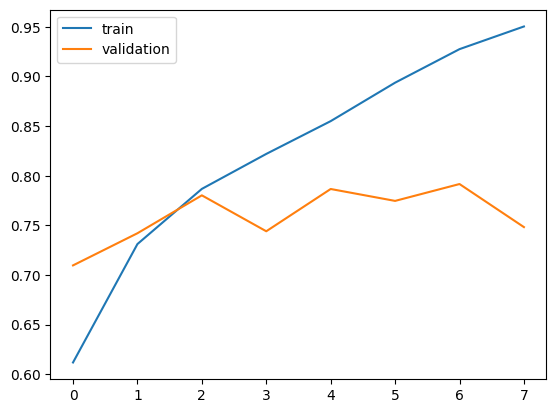

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.legend()
plt.show()

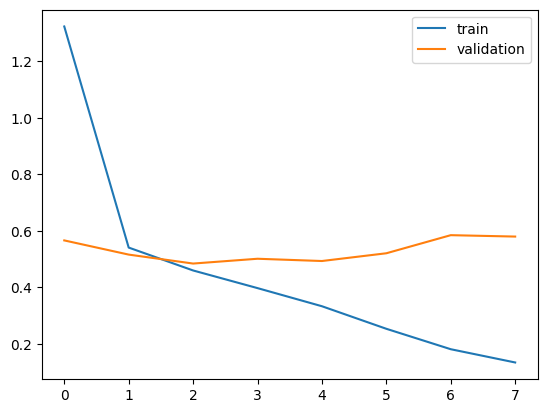

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting

#add more data
#data augemntation
#dropout layers
#early stopping
#batch normalisation
#regularisers
# reduce complexity

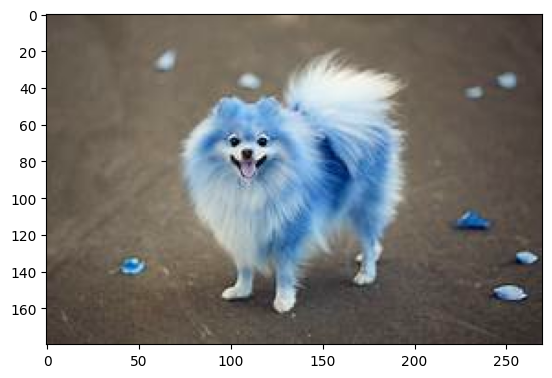

In [ ]:
#test inputs

import cv2

cat_img = cv2.imread('/content/cat.jpg')
dog_img = cv2.imread('/content/dog.jpg')
img2 = plt.imshow(dog_img)

In [ ]:
dog_img.shape

#need to resize to 256,256,3

(180, 270, 3)

In [ ]:
dog_img = cv2.resize(dog_img, (256, 256))  #resized to 256*256 pixel

In [ ]:
dog_img.shape

(256, 256, 3)

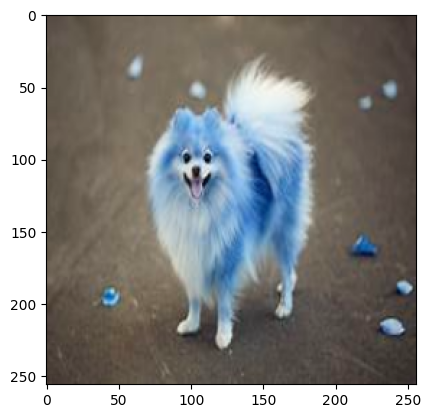

In [ ]:
plt.imshow(dog_img)

In [ ]:
test_input = dog_img.reshape(1,256,256,3)  #convert it in batch
test_input.shape

(1, 256, 256, 3)

In [ ]:
model.predict(test_input)

#0 - cat
#1 - dog

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[1.]], dtype=float32)

Data augemtation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
batch_size = 32

#creating miltiple images for training
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

#we will not create multiple images in testing - since this is only validating
test_datagen = ImageDataGenerator(rescale = 1./255)

#augementation + generator object - so we are applying data augementation in batches of 32
train_generator = train_datagen.flow_from_directory(
    '/content/dogs_vs_cats/train',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)


test_generator = test_datagen.flow_from_directory(
    '/content/dogs_vs_cats/test',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [18]:
train_generator

In [13]:
#shape of tensor - (256,256,3)

#create cnn model

model= Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid',  activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.fit(train_generator,
                    epochs = 25, validation_data = test_generator)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 212ms/step - accuracy: 0.9012 - loss: 0.2331 - val_accuracy: 0.8410 - val_loss: 0.4057
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 209ms/step - accuracy: 0.9096 - loss: 0.2213 - val_accuracy: 0.8896 - val_loss: 0.2635
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 261ms/step - accuracy: 0.9098 - loss: 0.2166 - val_accuracy: 0.8848 - val_loss: 0.2891
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 215ms/step - accuracy: 0.9147 - loss: 0.2006 - val_accuracy: 0.8742 - val_loss: 0.3225
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 210ms/step - accuracy: 0.9238 - loss: 0.1928 - val_accuracy: 0.8966 - val_loss: 0.2481
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 210ms/step - accuracy: 0.9235 - loss: 0.1842 - val_accuracy: 0.8818 - val_loss: 0.3405
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 215ms/step - accuracy: 0.9358 - loss: 0.1663 - val_accuracy: 0.8970 - val_loss: 0.2312
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 211ms/step - accuracy: 0.9317 -

In [ ]:
#for case when you need to first extract data from directory and then apply data augmentation

# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Step 1: Load the dataset with image_dataset_from_directory
# train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     'path/to/train_directory',
#     image_size=(200, 200),
#     batch_size=32,
#     label_mode='binary'
# )

# # Step 2: Create an ImageDataGenerator for augmentation
# train_datagen = ImageDataGenerator(
#     rescale=1./255,  # Rescale pixel values
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Apply ImageDataGenerator transformations by mapping
# train_dataset = train_dataset.map(lambda x, y: (train_datagen.random_transform(x), y))

#x is image, y is label - data augeemntation only on image

# train_dataset.map(lambda x, y: (train_datagen.random_transform(x), y)):
# x: The image data.
# y: The label data.
# train_datagen.random_transform(x): Applies the random transformation (like rotations, flips, etc.) to the image x.
# y: The label remains unchanged.

# # Now you can use this dataset for model training
# model.fit(train_dataset, epochs=10)
